<a href="https://colab.research.google.com/github/Apur52027/Machine-learing/blob/main/Copy_of_AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [5]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [6]:
# TODO: Load regression dataset

# Load the insurance dataset
url = "https://raw.githubusercontent.com/Apur52027/Dataset_ML/main/insurance.csv"
data = pd.read_csv(url)

# TODO: Display first 5 rows
data.head(5)
print("Data Shape:",data.shape)
print("Data Column",data.columns)
target_column = "charges"
print("Target Variable: ",target_column)

Data Shape: (1338, 7)
Data Column Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Target Variable:  charges


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [7]:
# TODO: Perform EDA
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
numeric_col=['age','bmi','children']

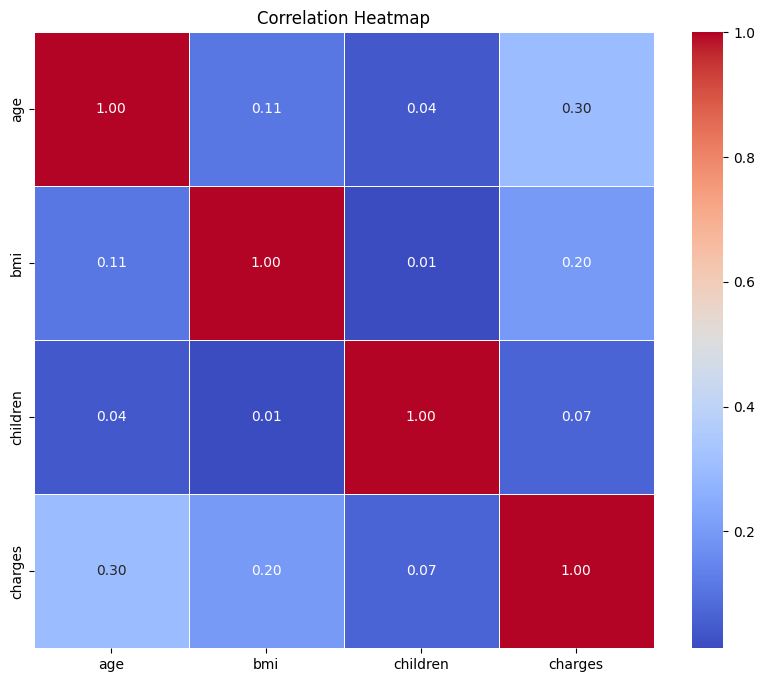

In [10]:
corr_matrix = data[numeric_col + [target_column]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

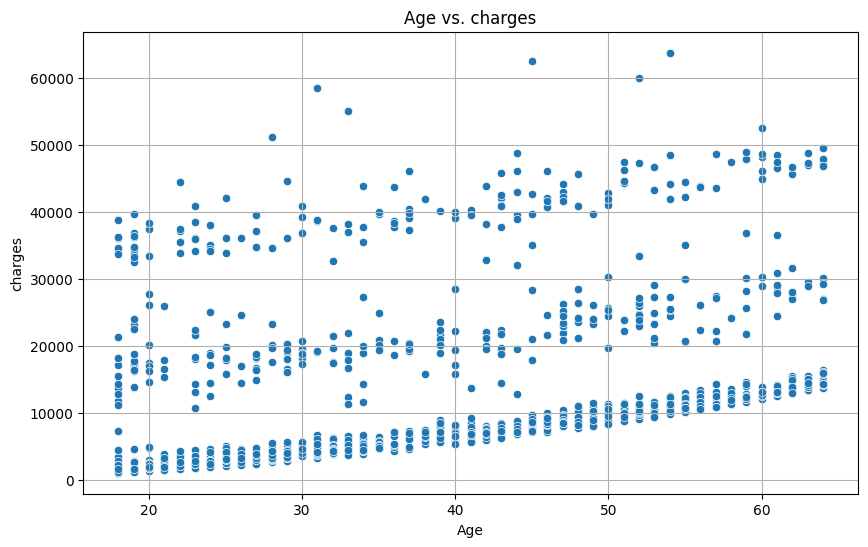

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y=target_column, data=data)
plt.title(f'Age vs. {target_column}')
plt.xlabel('Age')
plt.ylabel(target_column)
plt.grid(True)
plt.show()

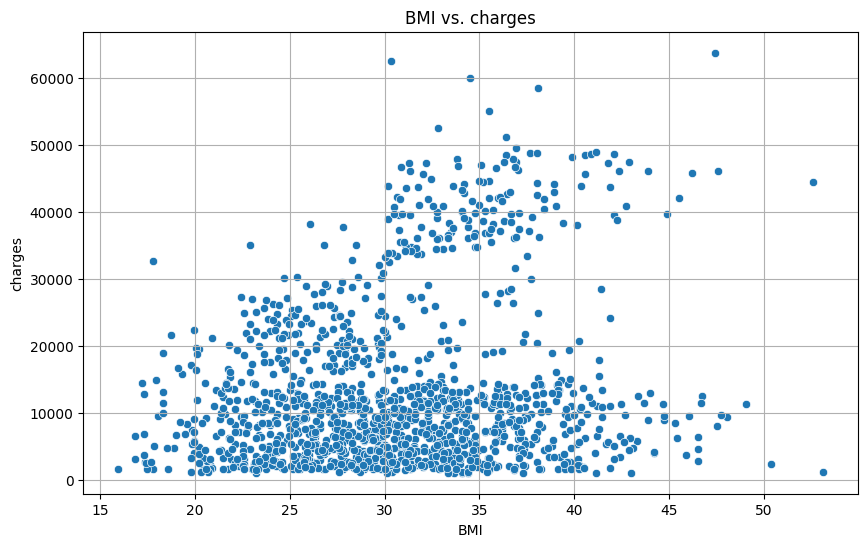

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='bmi',
    y=target_column,
    data=data
)
plt.title(f'BMI vs. {target_column}')
plt.xlabel('BMI')
plt.ylabel(target_column)
plt.grid(True)
plt.show()


## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [13]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
# TODO: Prepare features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

data = pd.get_dummies(
    data, columns=['region'],
    drop_first=True,
    dtype=int
    )
print(data.head(10))

# Separate features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 1   
4   32    1  28.880         0       0   3866.85520                 1   
5   31    0  25.740         0       0   3756.62160                 0   
6   46    0  33.440         1       0   8240.58960                 0   
7   37    0  27.740         3       0   7281.50560                 1   
8   37    1  29.830         2       0   6406.41070                 0   
9   60    0  25.840         0       0  28923.13692                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4      

In [15]:
# # Scale numerical features (excluding encoded categorical features)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train= scaler.fit_transform(X_train)
x_test= scaler.transform(X_test)

# print("Features prepared: Categorical features encoded, data split into training and testing sets, and numerical features scaled.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (1070, 8), X_test shape: (268, 8)
y_train shape: (1070,), y_test shape: (268,)


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [16]:
# TODO: Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Multiple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared (R²): {r2_linear:.2f}")

Multiple Linear Regression Model Evaluation:
  Mean Absolute Error (MAE): 4181.19
  Mean Squared Error (MSE): 33596915.85
  Root Mean Squared Error (RMSE): 5796.28
  R-squared (R²): 0.78


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [66]:
# TODO: Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree,include_bias= False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {degree}) Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"  Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_poly:.2f}")
print(f"  R-squared (R²): {r2_poly:.2f}")

print("\nComparison with Multiple Linear Regression:")
print(f"Linear Regression R²: {r2_linear:.2f}")
print(f"Polynomial Regression R²: {r2_poly:.2f}")

Polynomial Regression (Degree 2) Model Evaluation:
  Mean Absolute Error (MAE): 2729.50
  Mean Squared Error (MSE): 20712805.99
  Root Mean Squared Error (RMSE): 4551.13
  R-squared (R²): 0.87

Comparison with Multiple Linear Regression:
Linear Regression R²: 0.78
Polynomial Regression R²: 0.87


# Compare
- Polynomial Regression generally offers more flexibility to capture non-linear relationships in data, potentially leading to a better fit if the underlying data is not strictly linear.

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [18]:
# TODO: Support Vector Regression

from sklearn.svm import SVR

# Initialize and train the SVR model with an RBF kernel
# Using default C=1.0 and epsilon=0.1 for initial training
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression (RBF Kernel) Model Evaluation:")
print(f" Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f" Mean Squared Error (MSE): {mse_svr:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f" R-squared (R²): {r2_svr:.2f}")

Support Vector Regression (RBF Kernel) Model Evaluation:
 Mean Absolute Error (MAE): 8596.65
 Mean Squared Error (MSE): 166492259.91
 Root Mean Squared Error (RMSE): 12903.19
 R-squared (R²): -0.07


# Justification for RBF Kernel choice

##The RBF (Radial Basis Function) kernel is a good general-purpose choice for SVR when the relationship between features and the target variable is non-linear, and we don't have prior knowledge about the data's distribution. Given that Polynomial Regression performed better than Linear Regression, indicating non-linearity, the RBF kernel is a suitable option to explore. It maps data into a higher-dimensional space, allowing for complex decision boundaries and better capturing intricate patterns without explicitly defining the feature transformation.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [19]:
# TODO: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
# Using random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Model Evaluation:")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R²): {r2_rf:.2f}")

Random Forest Regressor Model Evaluation:
  Mean Absolute Error (MAE): 2550.67
  Mean Squared Error (MSE): 20955694.24
  Root Mean Squared Error (RMSE): 4577.74
  R-squared (R²): 0.87


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [67]:
# TODO: Load classification dataset

# Load the classification dataset (Loan Approval Prediction)
url_classification = "https://raw.githubusercontent.com/Apur52027/Dataset_ML/main/loan_data.csv"
loan_data = pd.read_csv(url_classification)

# TODO: Display first 5 rows
loan_data.head(5)
print("Data Shape:",loan_data.shape)
print("Data Column",loan_data.columns)

target_column = 'loan_status'
print("Target Variable: ",target_column)
print(f"\nClass distribution of the target variable '{target_column}':")
class_distribution = loan_data[target_column].value_counts()
print(class_distribution)


Data Shape: (45000, 14)
Data Column Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
Target Variable:  loan_status

Class distribution of the target variable 'loan_status':
loan_status
0    35000
1    10000
Name: count, dtype: int64


## Comment on imbalance
- There is a notable class imbalance. The majority class ('0') has 35000 samples, while the minority class ('1') has 10000 samples. This imbalance should be considered during model training and evaluation, possibly using techniques like resampling or adjusted class weights.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


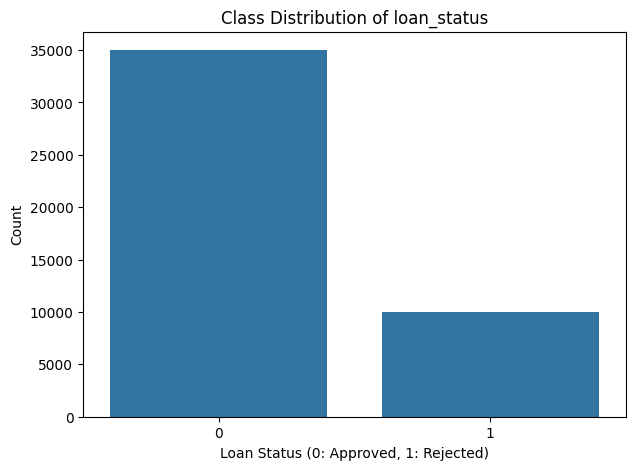

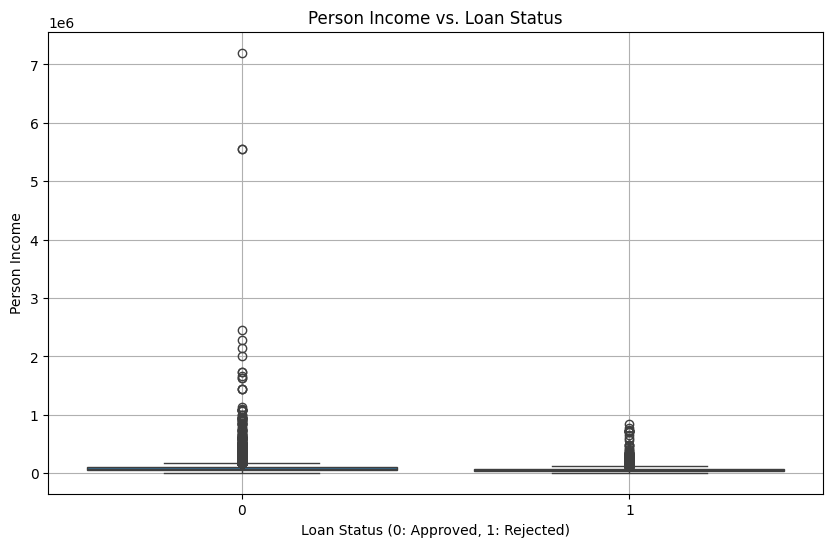

EDA for classification dataset completed. Plotted class distribution and 'person_income' vs 'loan_status'.


In [37]:
# TODO: Classification EDA

# Plot class counts
plt.figure(figsize=(7, 5))
sns.countplot(x=target_column, data=loan_data)
plt.title(f'Class Distribution of {target_column}')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Count')
plt.show()

# Plot at least one feature vs target (e.g., person_income vs. loan_status)
plt.figure(figsize=(10, 6))
sns.boxplot(x=target_column, y='person_income', data=loan_data)
plt.title('Person Income vs. Loan Status')
plt.xlabel('Loan Status (0: Approved, 1: Rejected)')
plt.ylabel('Person Income')
plt.grid(True)
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [38]:
loan_data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [40]:
le = LabelEncoder()
loan_data['person_gender'] = le.fit_transform(loan_data['person_home_ownership'])
loan_data['previous_loan_defaults_on_file']=le.fit_transform(loan_data['previous_loan_defaults_on_file'])

In [41]:
loan_data = pd.get_dummies(
    loan_data, columns=['person_education','person_home_ownership','loan_intent'],
    drop_first=True,
    dtype=int
    )

In [54]:
# TODO: Prepare classification features


X = loan_data.drop(columns=[target_column])
y = loan_data[target_column]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)
# print("Classification features prepared: Categorical features encoded, data split into training and testing sets, and numerical features scaled.")
print(f"X_train_clf shape: {X_train_clf.shape}, X_test_clf shape: {X_test_clf.shape}")
print(f"y_train_clf shape: {y_train_clf.shape}, y_test_clf shape: {y_test_clf.shape}")

X_train_clf shape: (36000, 22), X_test_clf shape: (9000, 22)
y_train_clf shape: (36000,), y_test_clf shape: (9000,)


## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)

Logistic Regression (L2 Penalty) Model Evaluation:
  Accuracy: 0.90
  Precision: 0.79
  Recall: 0.75


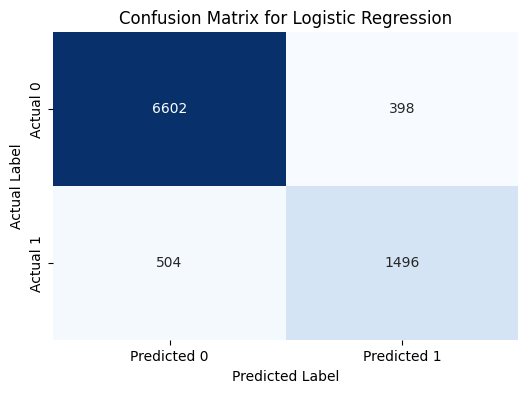

In [62]:
# TODO: Logistic Regression with L2

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model with L2 regularization
# Using 'liblinear' solver as it supports L2 penalty and is good for smaller datasets (or when feature count is not huge)
log_reg_model = LogisticRegression(penalty='l2', random_state=42)
log_reg_model.fit(X_train_clf, y_train_clf)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_clf)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test_clf, y_pred_log_reg)
precision_log_reg = precision_score(y_test_clf, y_pred_log_reg)
recall_log_reg = recall_score(y_test_clf, y_pred_log_reg)

print("Logistic Regression (L2 Penalty) Model Evaluation:")
print(f"  Accuracy: {accuracy_log_reg:.2f}")
print(f"  Precision: {precision_log_reg:.2f}")
print(f"  Recall: {recall_log_reg:.2f}")

# Show Confusion Matrix
cm_log_reg = confusion_matrix(y_test_clf, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)

Support Vector Machine (Linear Kernel) Model Evaluation:
  Accuracy: 0.90
  Precision: 0.79
  Recall: 0.74


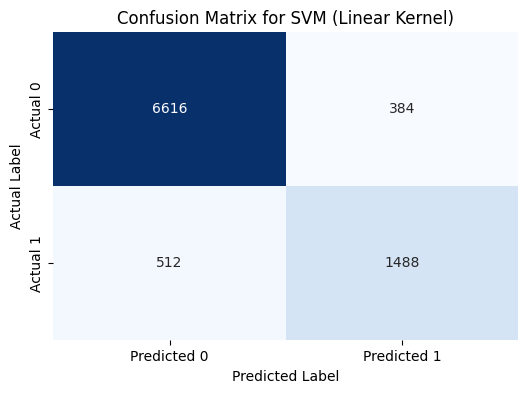

In [56]:
# TODO: SVM Classification

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_clf, y_train_clf)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_clf)

accuracy_svm = accuracy_score(y_test_clf, y_pred_svm)
precision_svm = precision_score(y_test_clf, y_pred_svm)
recall_svm = recall_score(y_test_clf, y_pred_svm)

print("Support Vector Machine (Linear Kernel) Model Evaluation:")
print(f" Accuracy: {accuracy_svm:.2f}")
print(f" Precision: {precision_svm:.2f}")
print(f" Recall: {recall_svm:.2f}")

# Show Confusion Matrix
cm_svm = confusion_matrix(y_test_clf, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for SVM (Linear Kernel)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant

Gaussian Naive Bayes Model Evaluation:
  Accuracy: 0.75
  Precision: 0.47
  Recall: 0.98


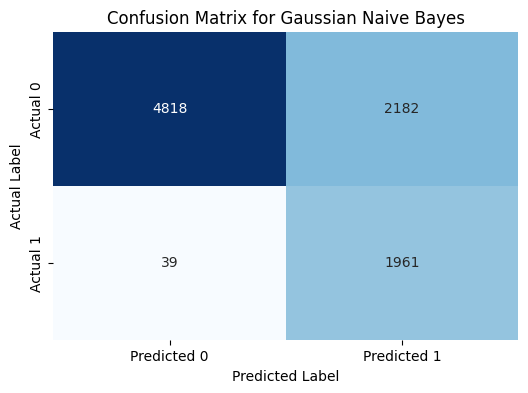

In [63]:
# TODO: Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nb_model = GaussianNB()
nb_model.fit(X_train_clf, y_train_clf)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_clf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test_clf, y_pred_nb)
precision_nb = precision_score(y_test_clf, y_pred_nb)
recall_nb = recall_score(y_test_clf, y_pred_nb)

print("Gaussian Naive Bayes Model Evaluation:")
print(f"  Accuracy: {accuracy_nb:.2f}")
print(f"  Precision: {precision_nb:.2f}")
print(f"  Recall: {recall_nb:.2f}")

# Show Confusion Matrix
cm_nb = confusion_matrix(y_test_clf, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)

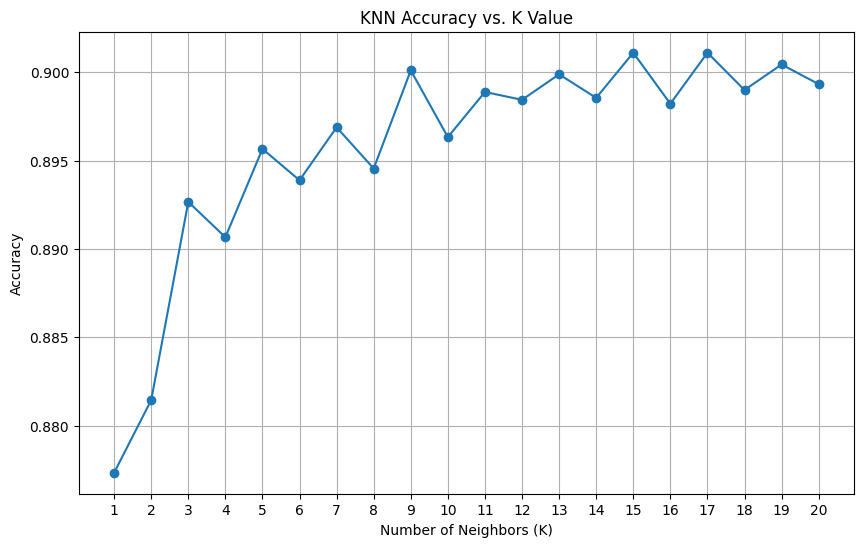

Best K value: 15 with Accuracy: 0.90

K-Nearest Neighbors (K=15) Model Evaluation:
  Accuracy: 0.90
  Precision: 0.84
  Recall: 0.69


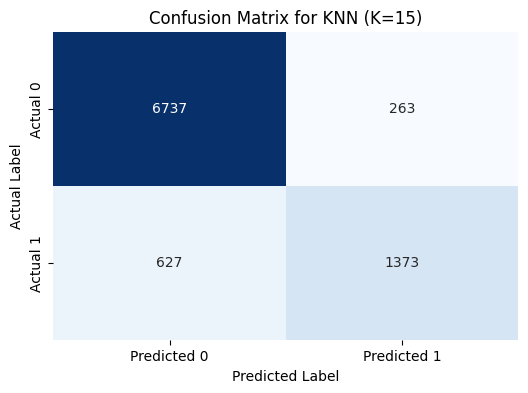

In [64]:
# TODO: KNN

from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_clf, y_train_clf)
    y_pred_knn = knn_model.predict(X_test_clf)
    accuracies.append(accuracy_score(y_test_clf, y_pred_knn))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
max_accuracy = np.max(accuracies)
print(f"Best K value: {best_k} with Accuracy: {max_accuracy:.2f}")


best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_clf, y_train_clf)
y_pred_best_knn = best_knn_model.predict(X_test_clf)

accuracy_best_knn = accuracy_score(y_test_clf, y_pred_best_knn)
precision_best_knn = precision_score(y_test_clf, y_pred_best_knn)
recall_best_knn = recall_score(y_test_clf, y_pred_best_knn)

print(f"\nK-Nearest Neighbors (K={best_k}) Model Evaluation:")
print(f"  Accuracy: {accuracy_best_knn:.2f}")
print(f"  Precision: {precision_best_knn:.2f}")
print(f"  Recall: {recall_best_knn:.2f}")

# Show Confusion Matrix for best KNN
cm_best_knn = confusion_matrix(y_test_clf, y_pred_best_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title(f'Confusion Matrix for KNN (K={best_k})')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)

Random Forest Classifier Model Evaluation:
  Accuracy: 0.93
  Precision: 0.89
  Recall: 0.77


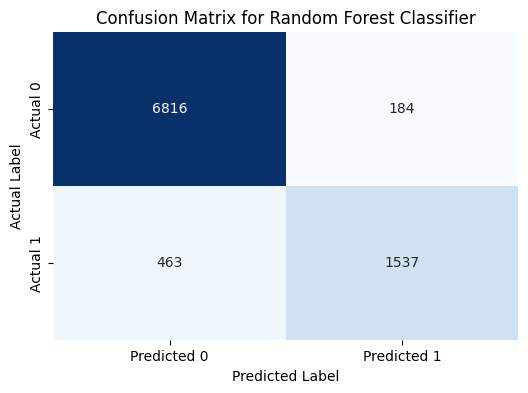

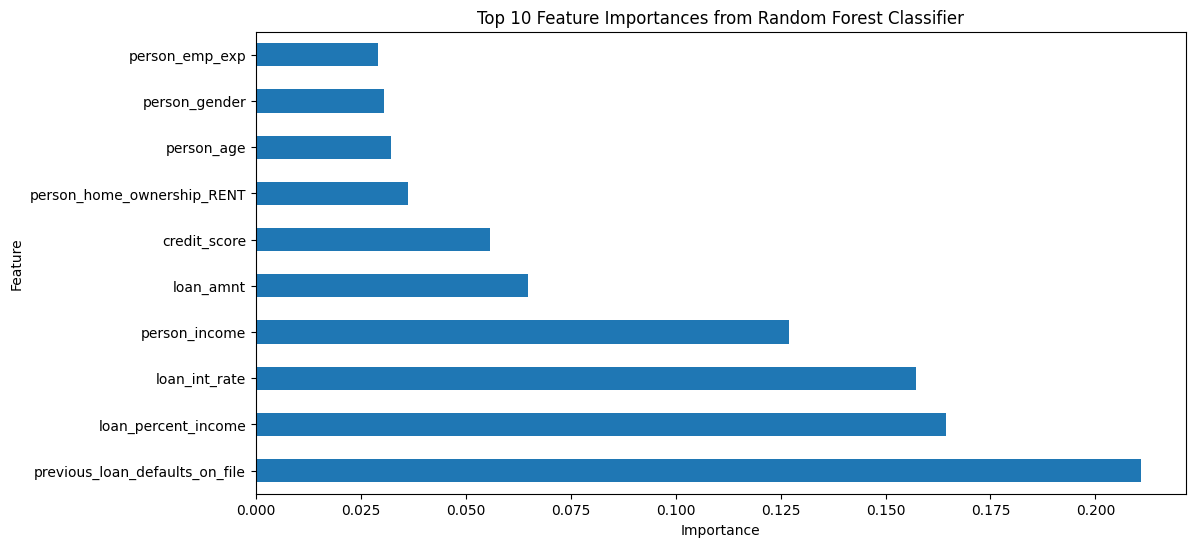

Feature importances from the Random Forest Classifier have been displayed.


In [60]:
# TODO: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Classifier model
rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_model.fit(X_train_clf, y_train_clf)

# Make predictions on the test set
y_pred_rf_clf = rf_clf_model.predict(X_test_clf)

# Evaluate the model
accuracy_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
precision_rf_clf = precision_score(y_test_clf, y_pred_rf_clf)
recall_rf_clf = recall_score(y_test_clf, y_pred_rf_clf)

print("Random Forest Classifier Model Evaluation:")
print(f"  Accuracy: {accuracy_rf_clf:.2f}")
print(f"  Precision: {precision_rf_clf:.2f}")
print(f"  Recall: {recall_rf_clf:.2f}")

# Show Confusion Matrix
cm_rf_clf = confusion_matrix(y_test_clf, y_pred_rf_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_clf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Show feature importance
# Use the columns from the original DataFrame X before scaling
feature_importances = pd.Series(rf_clf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(12, 6))
feature_importances.nlargest(10).plot(kind='barh') # Display top 10 features
plt.title('Top 10 Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print("Feature importances from the Random Forest Classifier have been displayed.")


--- Model Comparison ---

Regression Model Performance:
| Model                            |     MAE |         MSE |     RMSE |   R2 Score |
|:---------------------------------|--------:|------------:|---------:|-----------:|
| Polynomial Regression (Degree 2) | 2729.5  | 2.07128e+07 |  4551.13 |       0.87 |
| Random Forest Regressor          | 2550.67 | 2.09557e+07 |  4577.74 |       0.87 |
| Linear Regression                | 4181.19 | 3.35969e+07 |  5796.28 |       0.78 |
| Support Vector Regressor         | 8596.65 | 1.66492e+08 | 12903.2  |      -0.07 |


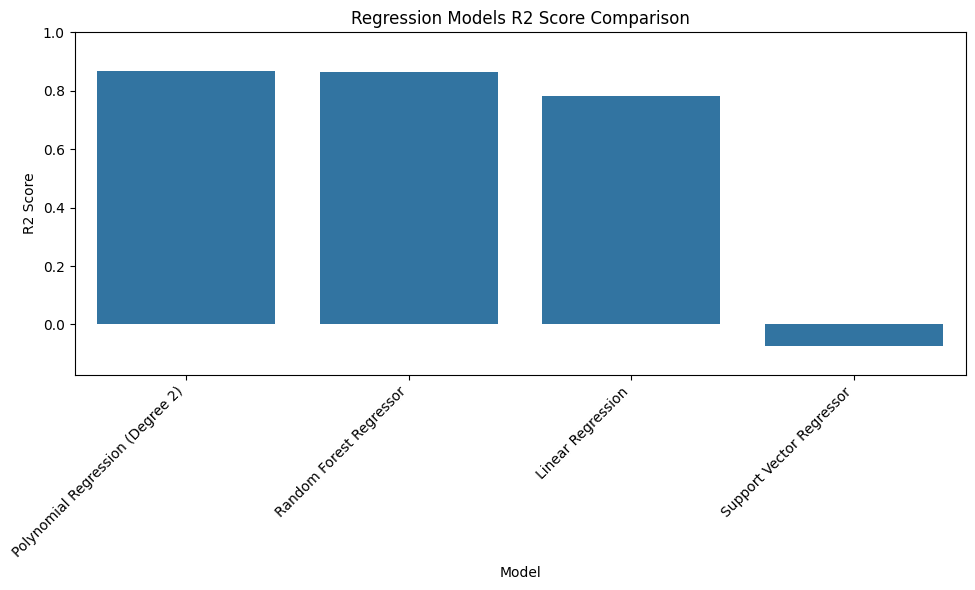


Classification Model Performance:
| Model                    |   Accuracy |   Precision |   Recall |
|:-------------------------|-----------:|------------:|---------:|
| Random Forest Classifier |       0.93 |        0.89 |     0.77 |
| K-Nearest Neighbors      |       0.9  |        0.84 |     0.69 |
| SVM (Linear Kernel)      |       0.9  |        0.79 |     0.74 |
| Logistic Regression      |       0.9  |        0.79 |     0.75 |
| Gaussian Naive Bayes     |       0.75 |        0.47 |     0.98 |


/tmp/ipython-input-3352949286.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=classification_models.sort_values(by='Accuracy', ascending=False), palette='viridis')


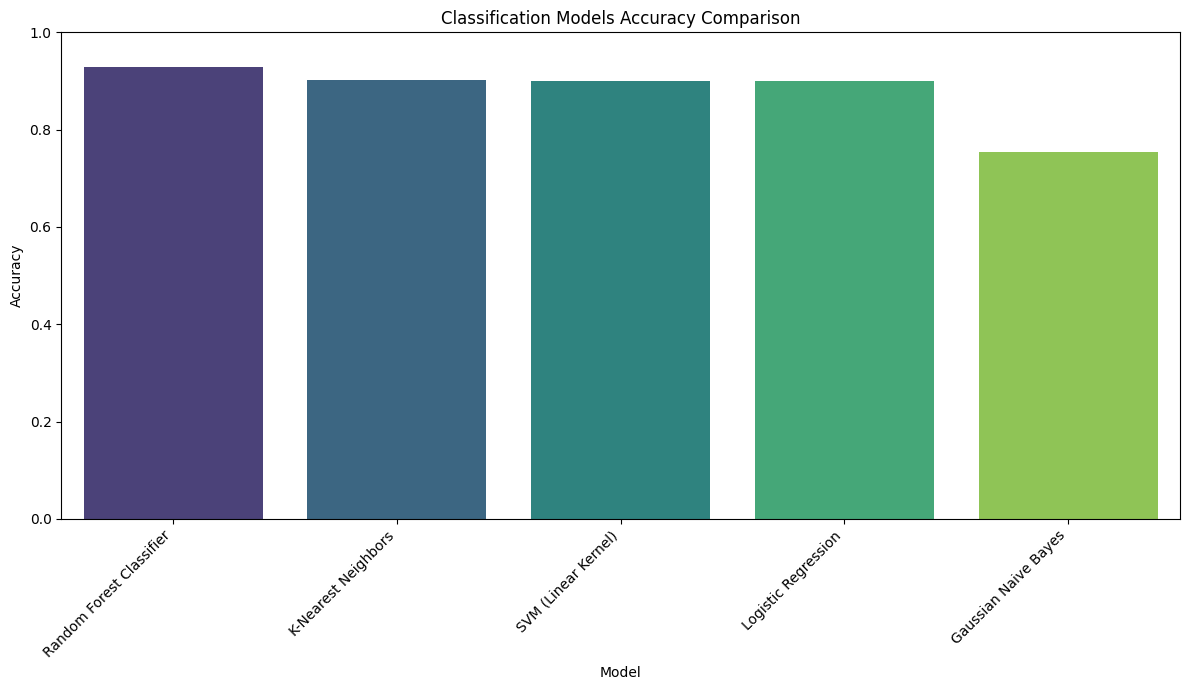


Based on R-squared, Polynomial Regression and Random Forest Regressor are the best for the regression task. For classification, Random Forest Classifier shows the highest accuracy and precision.


In [65]:
print("\n--- Model Comparison ---")

# --- Regression Model Comparison ---
regression_models = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)', 'Support Vector Regressor', 'Random Forest Regressor'],
    'MAE': [mae_linear, mae_poly, mae_svr, mae_rf],
    'MSE': [mse_linear, mse_poly, mse_svr, mse_rf],
    'RMSE': [rmse_linear, rmse_poly, rmse_svr, rmse_rf],
    'R2 Score': [r2_linear, r2_poly, r2_svr, r2_rf]
})
print("\nRegression Model Performance:")
print(regression_models.sort_values(by='R2 Score', ascending=False).round(2).to_markdown(index=False))

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=regression_models.sort_values(by='R2 Score', ascending=False))
plt.title('Regression Models R2 Score Comparison')
plt.ylabel('R2 Score')
plt.ylim(min(regression_models['R2 Score'].min(), 0) - 0.1, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Classification Model Comparison ---
classification_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM (Linear Kernel)', 'Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Random Forest Classifier'],
    'Accuracy': [accuracy_log_reg, accuracy_svm, accuracy_nb, accuracy_best_knn, accuracy_rf_clf],
    'Precision': [precision_log_reg, precision_svm, precision_nb, precision_best_knn, precision_rf_clf],
    'Recall': [recall_log_reg, recall_svm, recall_nb, recall_best_knn, recall_rf_clf]
})
print("\nClassification Model Performance:")
print(classification_models.sort_values(by='Accuracy', ascending=False).round(2).to_markdown(index=False))

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', data=classification_models.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Classification Models Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nBased on R-squared, Polynomial Regression and Random Forest Regressor are the best for the regression task. For classification, Random Forest Classifier shows the highest accuracy and precision.")

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## Best Regression Model and Why
- For the regression task, Polynomial Regression (Degree 2) and Random Forest Regressor were the best performers. Both achieved a higher R-squared value (0.87) and lower RMSE compared to Linear Regression and Support Vector Regression. This indicates they provide a better fit to the data and more accurate predictions. Polynomial Regression was effective at capturing non-linear relationships, while the Random Forest Regressor, as an ensemble method, offered robust predictions.

## Best Classification Model and Why
- For the classification task, the Random Forest Classifier was the best model. It demonstrated the highest accuracy (0.93) and precision (0.89) among all tested models. While Gaussian Naive Bayes had a high recall, its overall accuracy and precision were significantly lower. The Random Forest's ability to handle complex feature interactions and its strong performance across accuracy and precision metrics make it the preferred choice.

## TODO: Write your reflection here

- Polynomial Regression (degree 2) and Random Forest Regressor performed best, achieving higher R² (0.87) and lower RMSE than Linear Regression and SVR. Polynomial Regression captured non-linear patterns effectively, while Random Forest provided robust and accurate predictions through ensemble learning.

- The Random Forest Classifier was the best model because it achieved the highest accuracy (0.93) and precision (0.89). Although Gaussian Naive Bayes had higher recall, its lower accuracy and precision made it less reliable. Random Forest is preferred as it effectively captures complex feature interactions and performs consistently well across key evaluation metrics